In [53]:
import os 
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy import asarray

In [109]:
my_path=os.getcwd()
image_folder='all'
target_path=os.path.join(my_path, image_folder) 

In [94]:
target_path

'c:\\Users\\Lenovo\\Desktop\\Szkolenie\\jdszr6-slytherin_group\\DL project\\all'

In [95]:
tf.keras.preprocessing.image_dataset_from_directory(
    target_path,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(28, 28),
    shuffle=True,
    seed=44,
    validation_split=0.3,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    #**kwarags
)

Found 9666 files belonging to 2 classes.
Using 6767 files for training.


<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [110]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    target_path,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(28, 28),
    shuffle=True,
    seed=44,
    validation_split=0.3,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    #**kwarags
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    target_path,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(28, 28),
    shuffle=True,
    seed=44,
    validation_split=0.3,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    #**kwarags
)

Found 12937 files belonging to 24 classes.
Using 9056 files for training.
Found 12937 files belonging to 24 classes.
Using 3881 files for validation.


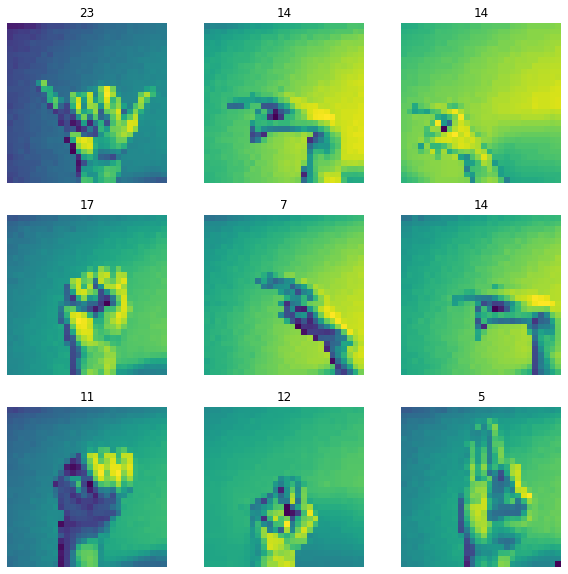

In [111]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i])#.numpy().astypa("unit8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [112]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1)
    ]
)

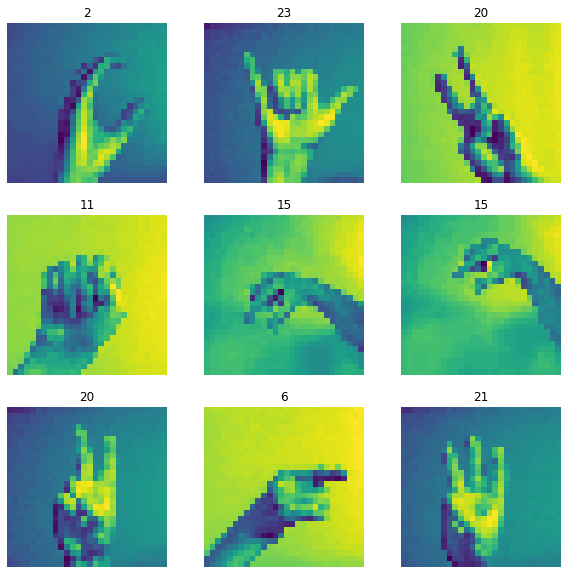

In [113]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_image = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [114]:
from PIL import Image
import numpy as np

In [115]:
img_data = np.random.random(size=(28, 28, 1))
img = tf.keras.preprocessing.image.array_to_img(img_data)
array = tf.keras.preprocessing.image.img_to_array(img)

In [116]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [118]:
# Define  & train the model without regularization
model1 = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(25, activation='softmax')
])

# Print the model summary
model1.summary()

# Use same settings
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING & VALIDATION:')
history1= model1.fit(
  train_ds, epochs=20, validation_data=val_ds
)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_11 (Dense)            (None, 128)             

In [ ]:
model1.save('model.h5')